In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
ipo = pd.read_csv('Indian_IPO_Market_Data.csv')

In [3]:
ipo.shape

(319, 9)

The dataset includes 319 different observations and 9 columns.

In [4]:
ipo.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')

In [5]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


The data consists of  following columns:

- `Date`: date when the IPO was listed

- `IPOName`: name of the IPO

- `Issue_Size`: size of the IPO issue, in INR Crores

- `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

- `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

- `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

- `Subscription_Total`: total number of times the IPO was subscribed overall

- `Issue_Price`: the price in INR at which the IPO was issued

- `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

In [6]:
ipo.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [7]:
ipo.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


The dates in the `Date` column appear to be formatted as "Day/Month/Year" and span from February 3, 2010, to October 17, 2022.

In [8]:
#summary statistics for target variable
ipo['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

Our target variable, `Listing_Gains_Percent`, is what we aim our model to predict. 

On average, IPOs tend to rise close to 4.75% from their IPO listing. There are extreme cases in both ends of the gain/loss spectrum. 

Furthermore, the target variable `Listing_Gains_Percent` appears to be continous. This will need to addressed if we plan on building a classification model by converting it into a categorical variable.

In [9]:
#summary statistics for all variables in dataset
ipo.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


## Exploratory Data Analysis

Time to explore the data a little more thoroughly. 

In [10]:
# target variable needs to be categorical for classification model
ipo['Listing_Gains_Profit'] = np.where(ipo['Listing_Gains_Percent'] > 0, 1, 0)

#checking to see if Listing_Gains categorized correctly
ipo[['Listing_Gains_Percent','Listing_Gains_Profit']].head()

,Listing_Gains_Percent,Listing_Gains_Profit
0,11.82,1
1,-84.21,0
2,17.13,1
3,-11.28,0
4,-5.20,0


In [11]:
# checking instances where Listing_Gains_Percent == 0
ipo.loc[ipo['Listing_Gains_Percent'] == 0][['Listing_Gains_Percent','Listing_Gains_Profit']]

,Listing_Gains_Percent,Listing_Gains_Profit
202,0.0,0
216,0.0,0


In [12]:
# check for missing values
ipo.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

In [13]:
ipo['Listing_Gains_Profit'].value_counts(normalize=True).round(4)*100

1    54.55
0    45.45
Name: Listing_Gains_Profit, dtype: float64

As alluded to before, at the time of this dataset's culmination, over 54% of listings end up being profitable.

### Variables to Consider

For the purpose of this analysis, there are certain variables that would help to only hinder further analysis. 
1. `Date` - There's just too many unique values (287) present in the column
2. `IPOName` - It's not likely that the name of an IPO would impact the performance of a stock in any meaningful way
3. `Listing_Gains_Percent` - After classifying the observations in this column, we won't need it any further.

In [14]:
# dropping unnecessary variables
ipo.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], inplace=True, axis=1)
 
#check
ipo.head(2)

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
0,189.8,48.44,106.02,11.08,43.22,165,1
1,328.7,59.39,51.95,3.79,31.11,145,0


## Visualizing the Data

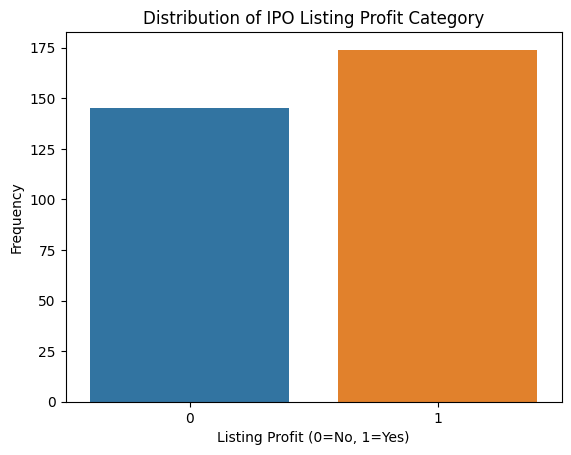

In [15]:
sns.countplot(x='Listing_Gains_Profit', data=ipo)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (0=No, 1=Yes)')
plt.ylabel('Frequency')
plt.show()

We'll explore the outliers present in each of the continuous variables of the dataset. 

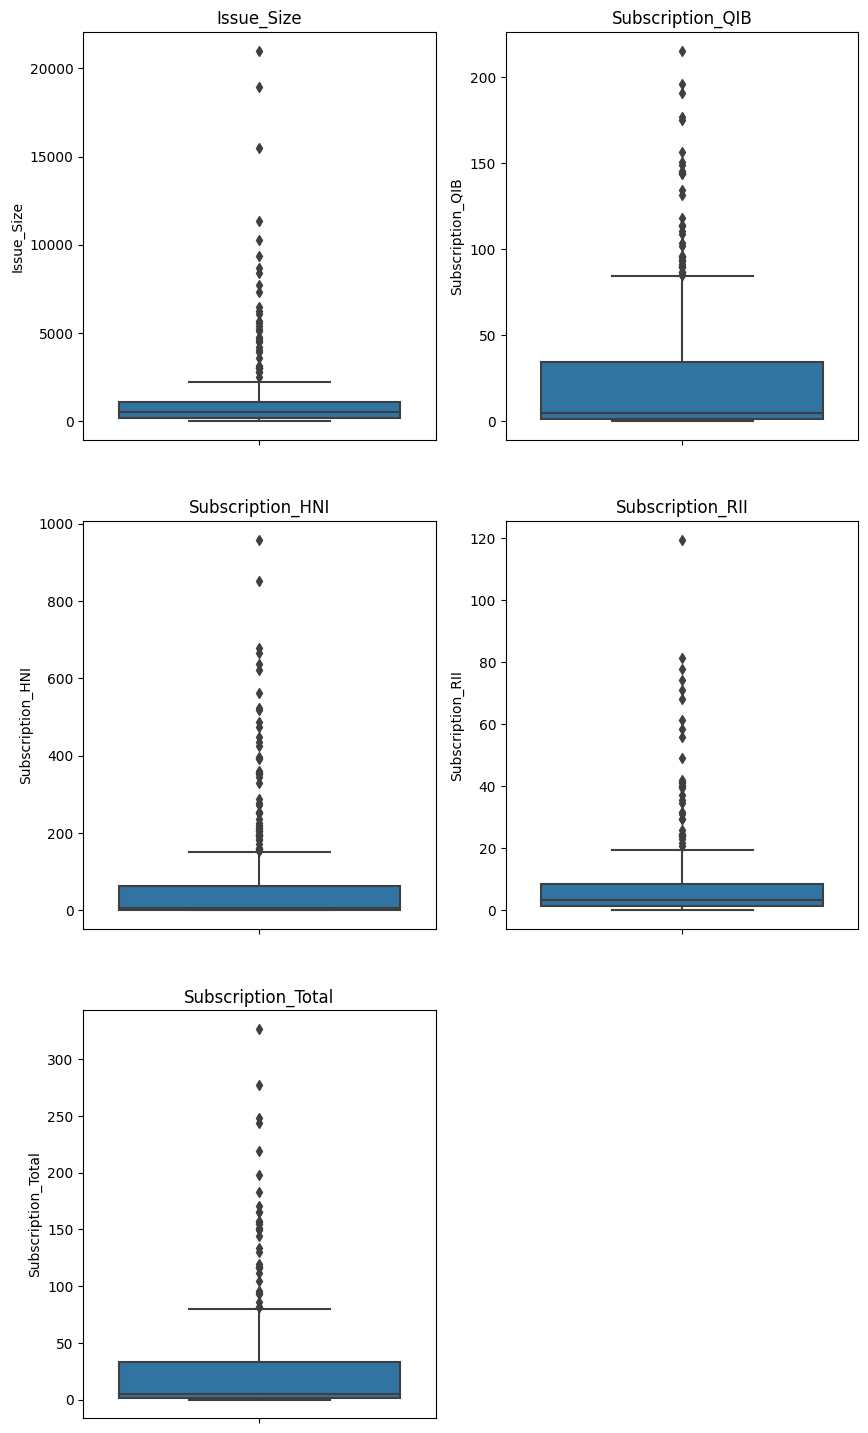

In [16]:
cont_cols = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total']
fig = plt.figure(figsize=(10,18))

for idx, col in enumerate(cont_cols):
    ax = plt.subplot(3, 2, idx+1)
    sns.boxplot(y=ipo[col], ax=ax).set(title=col)

Nearly all of the continuous variables have considerable outliers. Let's see just how many outliers there are for each of these continuous variables.

In [17]:
# function to find outliers using IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1 - 1.5 * IQR)) | (df>(q3 + 1.5 * IQR)))]
    return outliers

In [18]:
cont_cols = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total']

for col in cont_cols:
    outliers = find_outliers_IQR(ipo[col])
    print(f'Number of outliers in {col}:', len(outliers))
    print(f'Percentage of outliers in {col}:', round((len(outliers)/len(ipo)) * 100, 2),'%\n')

Number of outliers in Issue_Size: 34
Percentage of outliers in Issue_Size: 10.66 %

Number of outliers in Subscription_QIB: 35
Percentage of outliers in Subscription_QIB: 10.97 %

Number of outliers in Subscription_HNI: 48
Percentage of outliers in Subscription_HNI: 15.05 %

Number of outliers in Subscription_RII: 33
Percentage of outliers in Subscription_RII: 10.34 %

Number of outliers in Subscription_Total: 31
Percentage of outliers in Subscription_Total: 9.72 %



The percentage of outliers present in each variable are considerable as well. It's not good practice to exclude ten to fifteen percent of all observations from a dataset. Instead, these data points will be adjusted.   

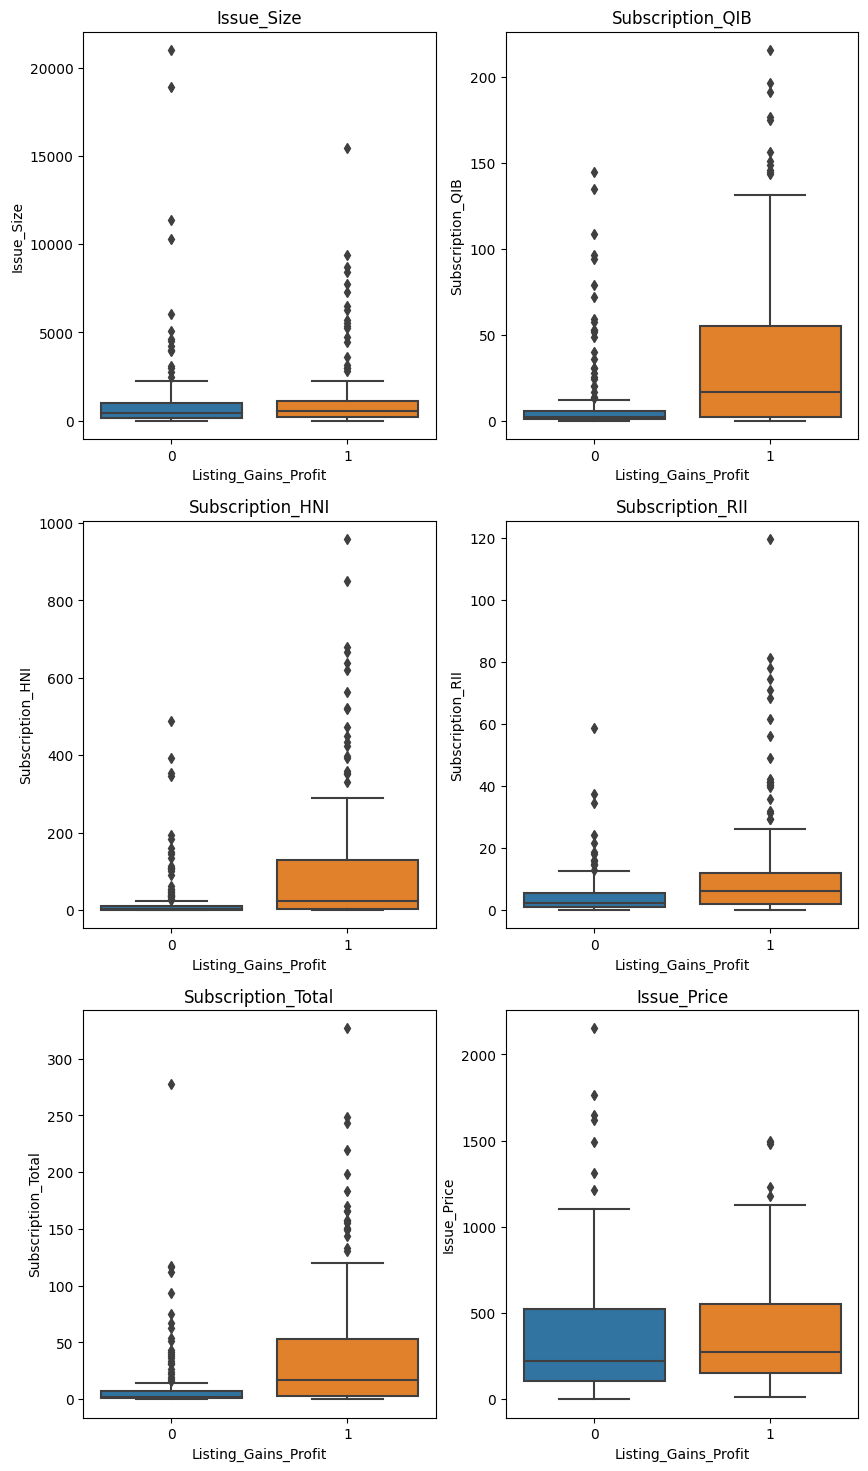

In [19]:
feature_cols = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total', 'Issue_Price']
fig = plt.figure(figsize=(10,18))

for idx, col in enumerate(feature_cols):
    ax = plt.subplot(3, 2, idx+1)
    sns.boxplot(x=ipo['Listing_Gains_Profit'], y=ipo[col], ax=ax).set(title=col)

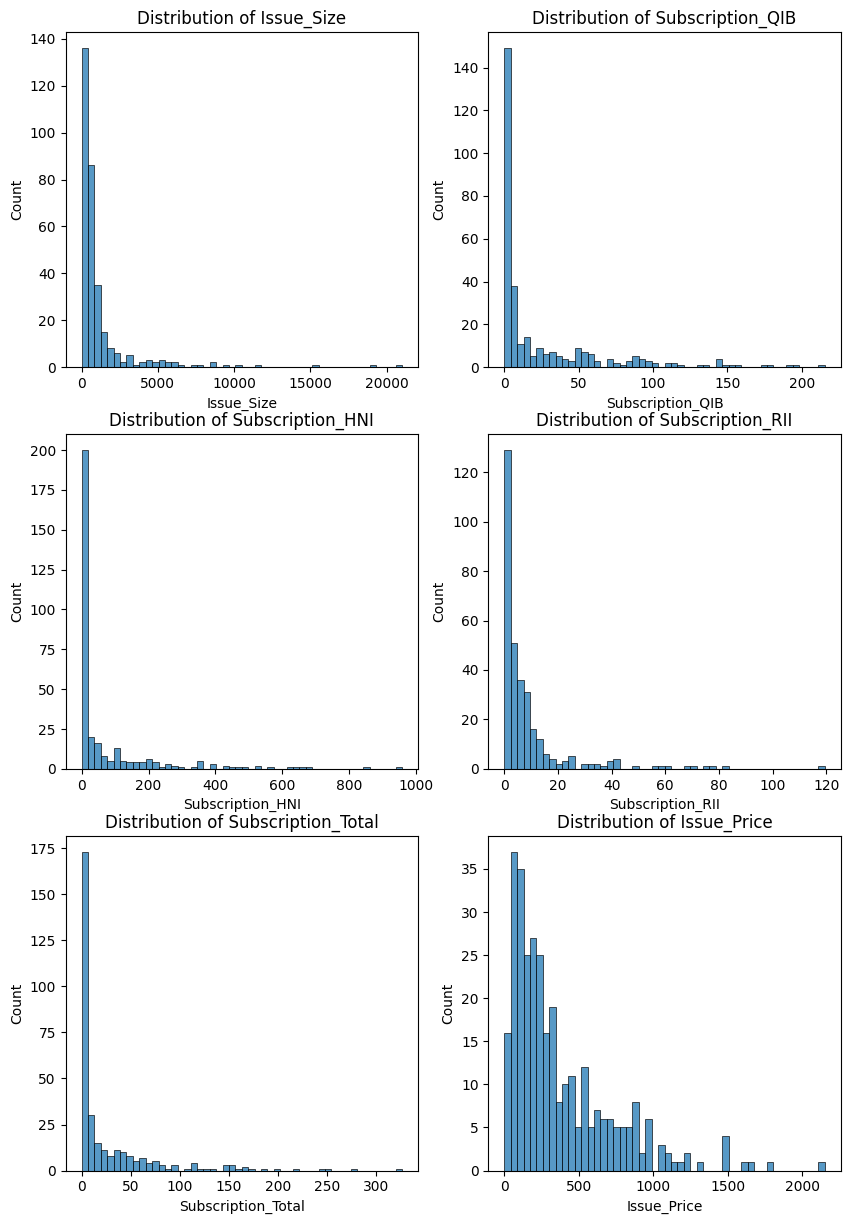

In [20]:
feature_cols = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total', 'Issue_Price']
fig = plt.figure(figsize=(10,20))

for idx, col in enumerate(feature_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.histplot(data=ipo, x=col, bins=50).set(title=f'Distribution of {col}', ylabel='Count')

In [21]:
# skewness of each column
ipo.skew()

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64

A heavy right skew is observed in of all the selected features (mean is significantly greater than the median). 

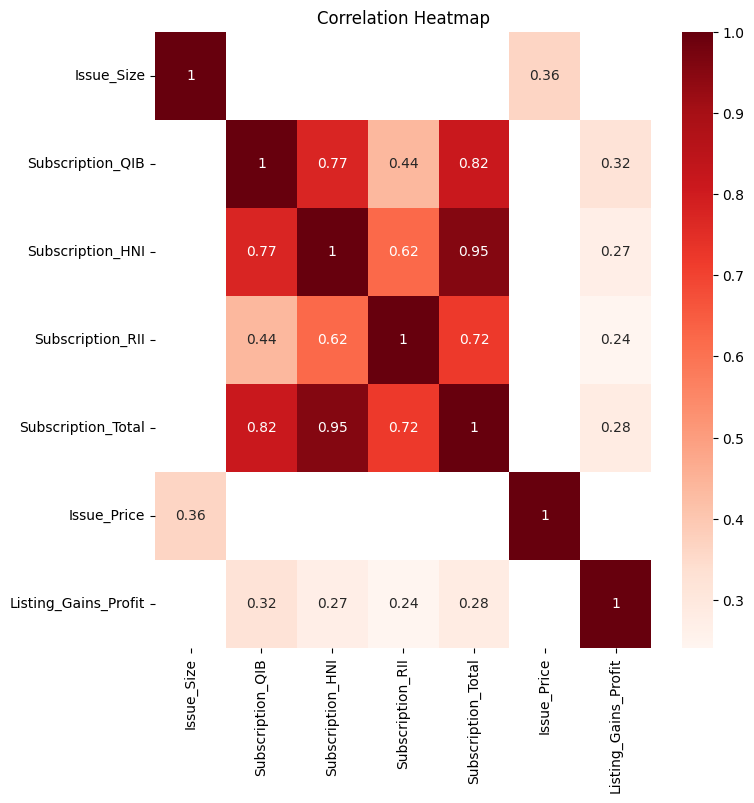

Subscription_Total    0.283340
Subscription_HNI      0.271879
Subscription_RII      0.240842
Issue_Price           0.039548
Issue_Size            0.004717
Name: Listing_Gains_Profit, dtype: float64

In [22]:
corr = ipo.corr().abs()
plt.figure(figsize=(8, 8))
sns.heatmap(corr[corr > 0.2], annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
# plt.tight_layout()
plt.show()
corr['Listing_Gains_Profit'].sort_values(ascending=False).iloc[2:].head(6) #excluding Listing_Gains vars

#### Visualization Summary 

Here are some of the findings that we can draw from the visualizations above:

- The histogram and the boxplots show that outliers are present in the data and needs outlier treatment.
- The boxplot of `Issue_Price`, with respect to `Listing_Gains_Profit`, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.


## Outlier Treatment

There are a large amount of outliers for many of variables in our dataset. Outright dismissing observations with outliers isn't a great option considering that outliers in certain columns make up to 15% of all observations.

Instead, we'll replace the values of these outliers with respective upper and lower bound values.

In [23]:
# function to find outliers using IQR
def clip_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    lower = (q1 - 1.5 * IQR) 
    upper = (q3 + 1.5 * IQR) 
    return df.clip(lower, upper)

In [24]:
cont_cols = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total']

for col in cont_cols:
    ipo[col] = clip_outliers(ipo[col])
    print(f'Informational statistics on {col}:\n',ipo[col].describe(), '\n')

Informational statistics on Issue_Size:
 count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64 

Informational statistics on Subscription_QIB:
 count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64 

Informational statistics on Subscription_HNI:
 count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64 

Informational statistics on Subscription_RII:
 count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64 

Informationa

Using the interquartile menthod to identify the outliers in each variable, outlier values are now clipped between the upper and lower bounds.

## Setting the Target and Predictor Values

In [25]:
target_variable = ['Listing_Gains_Profit']
predictors = list(set(list(ipo.columns)) - set(target_variable))
ipo[predictors] = ipo[predictors]/ipo[predictors].max()
ipo.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have created an object of the dependent variable called `target_variable` and also a list of all the features, excluding the target variable `Listing_Gains_Profit`. During data exploration, we observed that the distribution of the variables differed significantly. This could influence the modeling process, so to prevent this, we performed normalization by scaling the predictors. You can see that the normalized values of the predictors lie between 0 and 1.

## Creating the Holdout Validation Approach

With the predictors set, it's time to split the dataset into training and test sets.

In [26]:
X = ipo[predictors].values
y = ipo[target_variable].values

#splitting the arrays into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# checking total number of observations for each test and training sets 
print(f'Number of feature observations in training set:', X_train.shape[0])
print(f'Number of feature observations in test set:', X_test.shape[0])

# non/profitable observation count in training target variables
print(f'Number of observations where there was no profit in training set:', (y_train == 0).sum())
print(f'Number of observations where there was profit in training set:', (y_train == 1).sum())

# non/profitable observation count in test target variables
print(f'Number of observations where there was no profit in test set:', (y_test == 0).sum())
print(f'Number of observations where there was profit in test set:', (y_test == 1).sum())

Number of feature observations in training set: 255
Number of feature observations in test set: 64
Number of observations where there was no profit in training set: 119
Number of observations where there was profit in training set: 136
Number of observations where there was no profit in test set: 26
Number of observations where there was profit in test set: 38


The dataset appears to be adequately split.   

## Defining the Deep Learning Classification Model

In [27]:
tf.random.set_seed(100) # reproducibility
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output

2024-01-09 20:14:18.241961: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-01-09 20:14:18.242192: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.182.3 does not match DSO version 470.161.3 -- cannot find working devices in this configuration


The model is instantiatied using the sequential model class in TensorFlow's Keras. The model architecture is comprised of four hidden layers with `relu` as the activation function. The output layer uses a `sigmoid` activation function, which is a good choice for a binary classification model.

## Compiling and Training the Model

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7412
Epoch 2/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7451
Epoch 3/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7647
Epoch 4/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7608
Epoch 5/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7529
Epoch 6/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7490
Epoch 7/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7647
Epoch 8/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7490
Epoch 9/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7490
Epoch 10/250
8/8 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7608
Epoch 11/250
8/8 [===========

The model was compiled with the `Adam` optimizer, `BinaryCrossentropy` set as its loss function, and `accuracy` as the evaluation metric. 

With the model compiled, the model was fitted onto the training set, setting the `epoch` count to 250. We can see that the accuracy improved over the 250 epochs.

## Model Evaluation

In [33]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8196


[0.37652450799942017, 0.8196078538894653]

In [34]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.7751 - accuracy: 0.7031


[0.7750781178474426, 0.703125]

The model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 82% on the training data and 70% on the test data. Ideally, the higher the accuracy value, the better the model is performing.

Unfortunately, the accuracy drops when we test the model on unseen data, as is the case with the test set. This suggests that the model is overfitting and needs to adjusted.

## Conclusion

In this project, we have built Deep Learning Classification models using the deep learning framework, Keras, in TensorFlow. We used a real-world IPO dataset and built a classifier algorithm to predict whether an IPO will list at profit or not.

We used the Sequential API to build the model, which is achieving a decent accuracy of 75% and 74% on training and test data, respectively. We see that the accuracy is consistent across the training and test datasets, which is a promising sign. 

This is just one of the many ways to model this solution — you can try out different combinations to further improve model performance.